In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("sentiment_analysis.csv")
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
#DATA PREPROCESSING
data["tweet"] = data["tweet"].str.lower()

In [ ]:
#Delete Punctuations
data["tweet"] = data["tweet"].fillna('')
data["tweet"] = data["tweet"].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

In [ ]:
#Delete Numbers
data["tweet"] = data["tweet"].fillna('').apply(lambda x:''.join([i for i in x if not i.isdigit()]))

In [ ]:
#Delete Stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [ ]:
#Tokenization
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

# Apply lemmatization to the 'tweet' column
data["tweet"] = data["tweet"].apply(lemmatize_text)

In [ ]:
data

,id,label,tweet
0,1,0,fingerprint pregnancy test httpsgooglhmfqv and...
1,2,0,finally transparant silicon case thank uncle y...
2,3,0,love would go talk makememorie unplug relax ip...
3,4,0,I m wire know I m george make way iphone cute ...
4,5,1,amazing service apple will not even talk quest...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,would like wish amazing day make every minute ...
7917,7918,0,help lovely year old neighbor ipad morning mak...
7918,7919,0,finally get smart pocket wifi stay connect any...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.5 MB/s eta 0:00:00


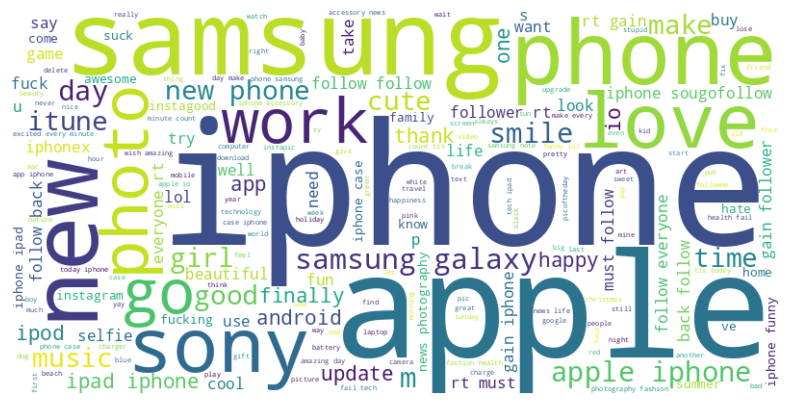

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Combine all tweets into a single string
all_tweets = " ".join(data["tweet"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Sentiment Anlaysis
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data["polarity_scores"] = data["tweet"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
data[0:29]

,id,label,tweet,polarity_scores
0,1,0,fingerprint pregnancy test httpsgooglhmfqv and...,0.7845
1,2,0,finally transparant silicon case thank uncle y...,0.7096
2,3,0,love would go talk makememorie unplug relax ip...,0.7964
3,4,0,I m wire know I m george make way iphone cute ...,0.4588
4,5,1,amazing service apple will not even talk quest...,0.4019
5,6,1,iphone software update fuck phone big time stu...,-0.7845
6,7,0,happy us instapic instadaily we sony xperia xp...,0.5719
7,8,0,new type c charger cable uk httpwwwebaycoukitm...,-0.4404
8,9,0,bout go shop listen music iphone justme music ...,0.0000
9,10,0,photo fun selfie pool water sony camera picoft...,0.7430


______

<ipython-input-20-3e76c05cdbf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="polarity_scores", data=data, palette={'0': '#9126bd', '1': '#db3daa'})


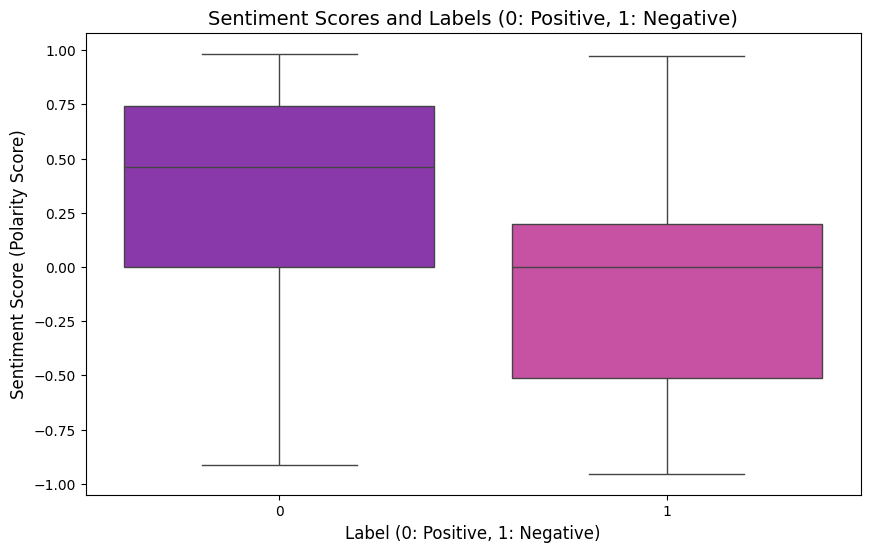

In [ ]:
# Visualization: Distribution of 0 (positive) and 1 (negative) labels by Polarity Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="polarity_scores", data=data, palette={'0': '#9126bd', '1': '#db3daa'})

# Title and labels
plt.title("Sentiment Scores and Labels (0: Positive, 1: Negative)", fontsize=14)
plt.xlabel("Label (0: Positive, 1: Negative)", fontsize=12)
plt.ylabel("Sentiment Score (Polarity Score)", fontsize=12)

# Show the plot
plt.show()


In [ ]:
#Dependent and independent variables
X = data["tweet"]#independent
y = data["label"]#dependent


In [ ]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()
X_tf_idf_vectorizer = tf_idf_vectorizer.fit_transform(X)

In [ ]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_vectorizer, y, test_size=0.2, random_state=42)

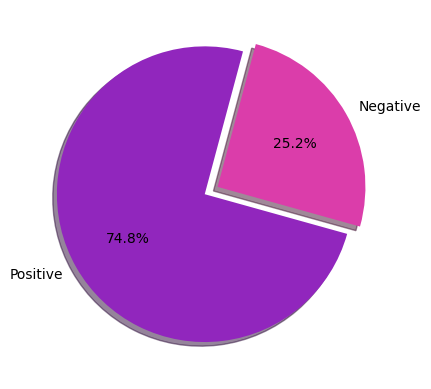

In [ ]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'],colors=['#9126bd', '#db3daa'],explode=(0, 0.1),autopct='%1.1f%%', shadow=True, startangle=75)
plt.show()

In [ ]:
data.head()

,id,label,tweet,polarity_scores
0,1,0,fingerprint pregnancy test httpsgooglhmfqv and...,0.7845
1,2,0,finally transparant silicon case thank uncle y...,0.7096
2,3,0,love would go talk makememorie unplug relax ip...,0.7964
3,4,0,I m wire know I m george make way iphone cute ...,0.4588
4,5,1,amazing service apple will not even talk quest...,0.4019


In [ ]:
# SMOTE for handling imbalanced data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.7 MB/s eta 0:00:00


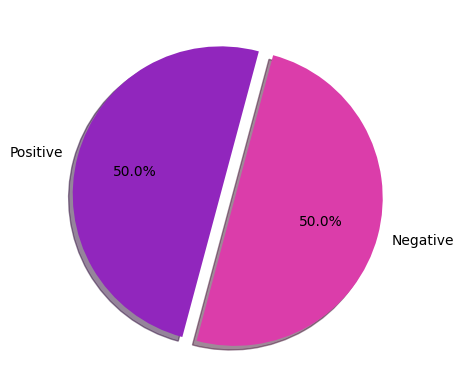

In [ ]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'],colors=['#9126bd', '#db3daa'],explode=(0, 0.1),autopct='%1.1f%%', shadow=True, startangle=75)
plt.show()

In [ ]:
# Function to plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
#Sentiment Modeling with Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8945707070707071
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1152
           1       0.81      0.80      0.80       432

    accuracy                           0.89      1584
   macro avg       0.87      0.86      0.87      1584
weighted avg       0.89      0.89      0.89      1584



In [ ]:
#Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1073,   79],
       [  88,  344]])

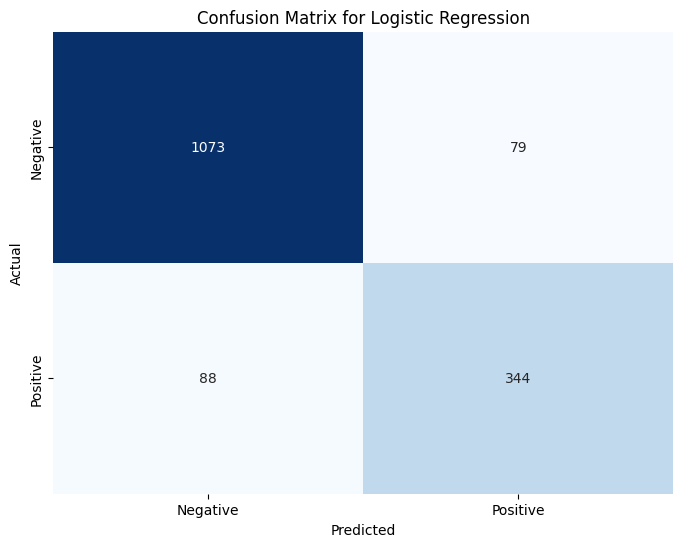

In [ ]:
# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

In [ ]:
#Sentiment Modeling with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_smote, y_train_smote)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8901515151515151
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1152
           1       0.82      0.76      0.79       432

    accuracy                           0.89      1584
   macro avg       0.87      0.85      0.86      1584
weighted avg       0.89      0.89      0.89      1584



In [ ]:

#Confusion matrix for Random Forest Classifier
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1080,   72],
       [ 102,  330]])

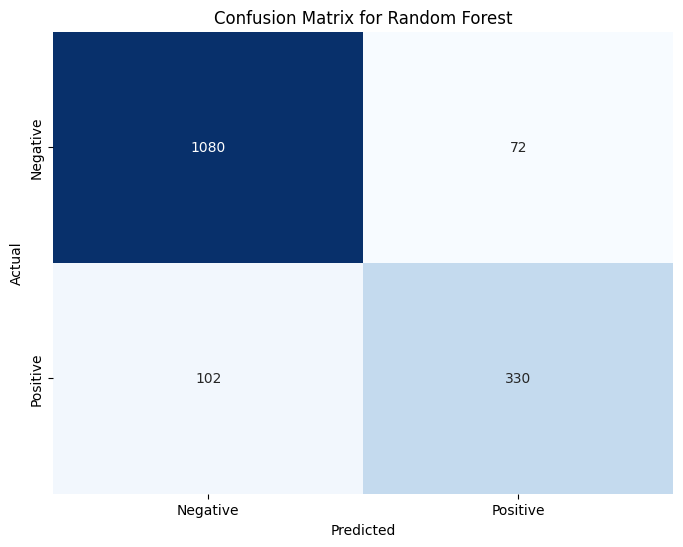

In [ ]:
# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, y_pred, "Random Forest")

In [ ]:
#Sentiment Modeling with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_smote, y_train_smote)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8320707070707071
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1152
           1       0.70      0.67      0.69       432

    accuracy                           0.83      1584
   macro avg       0.79      0.78      0.79      1584
weighted avg       0.83      0.83      0.83      1584



In [ ]:
#Confusion Matrix for Decision Tree Classifier
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1028,  124],
       [ 142,  290]])

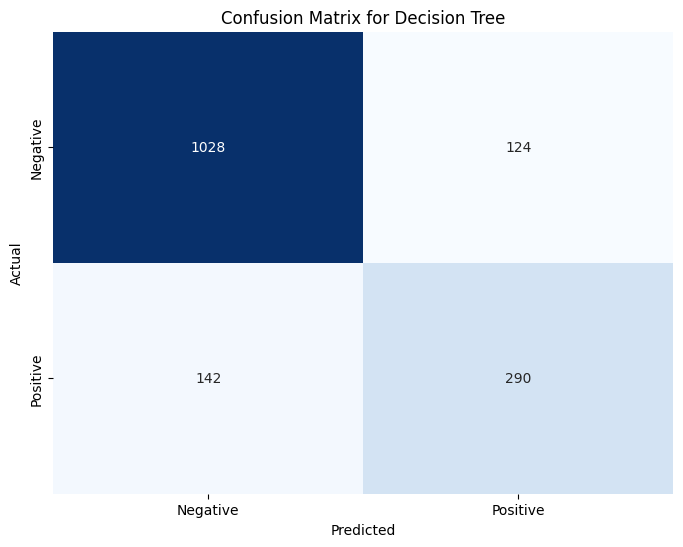

In [ ]:
# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred, "Decision Tree")

In [ ]:
#Sentiment Modeling with Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8825757575757576
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1152
           1       0.86      0.68      0.76       432

    accuracy                           0.88      1584
   macro avg       0.88      0.82      0.84      1584
weighted avg       0.88      0.88      0.88      1584



In [ ]:
#Confusion Matrix for Support Vector Machine
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1105,   47],
       [ 139,  293]])

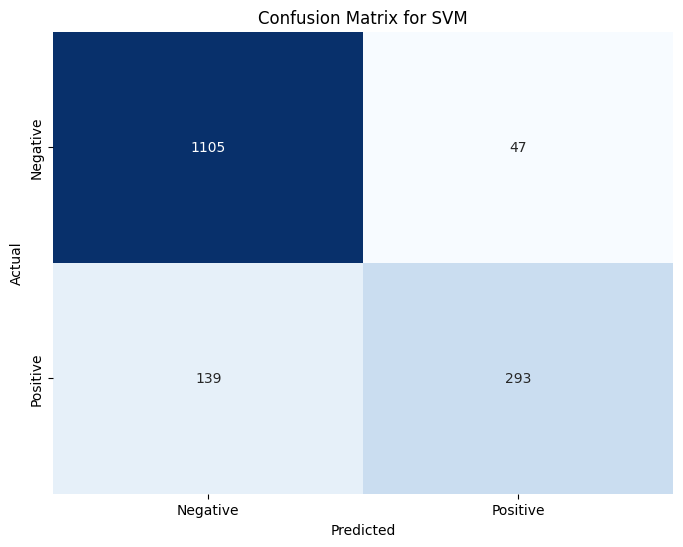

In [ ]:
plot_confusion_matrix(y_test, y_pred, "SVM")

In [ ]:
#Sentiment Modeling with Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8731060606060606
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      1152
           1       0.70      0.95      0.80       432

    accuracy                           0.87      1584
   macro avg       0.84      0.90      0.85      1584
weighted avg       0.90      0.87      0.88      1584



In [ ]:
#Confusion Matrix for MNB
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[973, 179],
       [ 22, 410]])

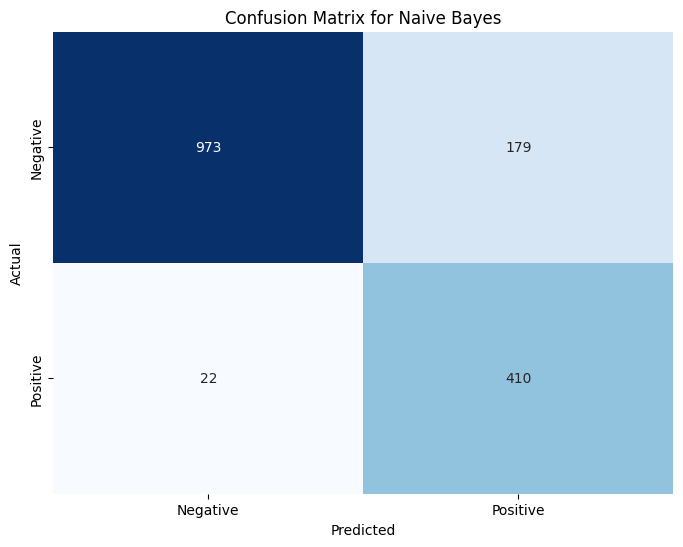

In [ ]:
# Plot Confusion Matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred, "Naive Bayes")

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    text = " ".join(x for x in str(text).split() if x not in sw)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)


# Get user input
user_input = input("Enter a text to classify: ")

# Preprocess the user input
preprocessed_input = preprocess_text(user_input)

# Transform the input using the same TF-IDF vectorizer
input_vectorized = tf_idf_vectorizer.transform([preprocessed_input])


# Predict using all models
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Naive Bayes": nb_model
}

for model_name, model in models.items():
    prediction = model.predict(input_vectorized)[0]
    print(f"{model_name} Prediction: {prediction}")